In [2]:
# import torch
from tool.darknet2pytorch import Darknet
import cv2
import matplotlib.pyplot as plt

In [1]:
cfgfile = './../cfg/yolov4.cfg'
weights = './../weights/yolov4.weights'

# Model load from cfg

In [3]:
m = Darknet(cfgfile)

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear


In [4]:
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   15 conv     64  1 x 1 / 1   152 x 152 x  64   ->   152 x 152 x  64
   16 conv     64  3 x 3 / 1

# Model load from weights

In [5]:
m.load_weights(weights)

# Demo

In [6]:
from tool.utils import *
from tool.torch_utils import *

(608, 608, 3)


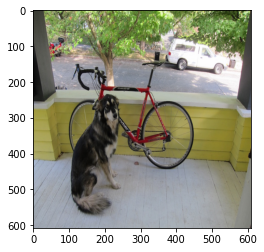

In [7]:
imgfile = './data/dog.jpg'
img = cv2.imread(imgfile)
sized = cv2.resize(img, (m.width, m.height))
sized = cv2.cvtColor(sized, cv2.COLOR_BGR2RGB)

print(sized.shape)
plt.imshow(sized)
plt.show()

In [8]:
use_cuda = 1
if use_cuda:
    m.cuda()

In [9]:
boxes = do_detect(m, sized, conf_thresh=0.4, nms_thresh=0.6, use_cuda=use_cuda)

-----------------------------------
           Preprocess : 0.008391
      Model Inference : 0.196655
-----------------------------------
-----------------------------------
       max and argmax : 0.005965
                  nms : 0.000810
Post processing total : 0.006775
-----------------------------------


In [10]:
boxes

[[[0.14903378, 0.22121671, 0.74544024, 0.74030805, 0.923744, 0.923744, 1],
  [0.6038546, 0.13285464, 0.8914515, 0.29499412, 0.9179137, 0.9179137, 7],
  [0.16750929, 0.3906061, 0.4076814, 0.9398119, 0.97906077, 0.97906077, 16]]]

In [11]:
namesfile = 'data/voc.names'
class_names = load_class_names(namesfile)

In [12]:
output = plot_boxes_cv2(img, boxes[0], savename=None, class_names=class_names)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

bicycle: 0.923744
cat: 0.917914
sheep: 0.979061


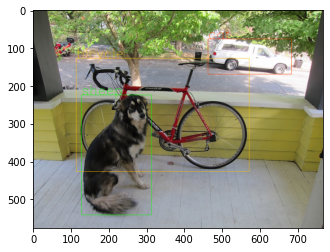

In [13]:
plt.imshow(output)
plt.show()

In [14]:
import tool.config as tools
block = tools.parse_cfg('./cfg/yolov4.cfg')
block

[{'type': 'net',
  'batch': '64',
  'subdivisions': '8',
  'width': '608',
  'height': '608',
  'channels': '3',
  'momentum': '0.949',
  'decay': '0.0005',
  'angle': '0',
  'saturation': '1.5',
  'exposure': '1.5',
  'hue': '.1',
  'learning_rate': '0.0013',
  'burn_in': '1000',
  'max_batches': '500500',
  'policy': 'steps',
  'steps': '400000,450000',
  'scales': '.1,.1',
  'mosaic': '1'},
 {'type': 'convolutional',
  'batch_normalize': '1',
  'filters': '32',
  'size': '3',
  'stride': '1',
  'pad': '1',
  'activation': 'mish'},
 {'type': 'convolutional',
  'batch_normalize': '1',
  'filters': '64',
  'size': '3',
  'stride': '2',
  'pad': '1',
  'activation': 'mish'},
 {'type': 'convolutional',
  'batch_normalize': '1',
  'filters': '64',
  'size': '1',
  'stride': '1',
  'pad': '1',
  'activation': 'mish'},
 {'type': 'route', 'layers': '-2'},
 {'type': 'convolutional',
  'batch_normalize': '1',
  'filters': '64',
  'size': '1',
  'stride': '1',
  'pad': '1',
  'activation': 'mis